# Лабораторная работа №1. Регрессия

**Тема:** *Сравнение линейной регрессии, случайного леса (Random Forest Regressor), градиентного бустинга (XGBoost) на задаче регрессии.*

**Цели:**

- *Научиться строить, оптимизировать и оценивать регрессионные модели.*
- *Понять, как интерпретировать важность признаков (feature importance).*
- *Понять, как увеличивать кол-во признаков (feature tuning).*
- *Исследовать влияние преобразований признаков (фичей), регуляризации и гиперпараметров.*

**Условия:**

- *numpy, pandas, scikit-learn, XGBoost*
- *выбрать датасет для 1-ой и 2-ой лабораторной работы*

**Пункты:**

1. Подготовка данных + Feature Tuning
2. Создание метрик
3. Базовая модель линейной регрессии
4. Улучшение линейной регрессии
5. Случайный лес регрессор
6. Градиентный бустинг (XGBoost)
7. Feature Importance
8. Написание своих реализаций (классы)
9. Подведение итогов


## О команде (ЗАПОЛНИТЬ СВОИМИ ДАННЫМИ)

| Фамилия И.О.        | Группа | Роль в команде | Что делал                    |
|---------------------|--------|----------------|------------------------------|
| Велиев Р.Р.         | 309    | Solo     | Всё сам                     |

 Датасет: [student_habits_performance](https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance)

## Описание датасета (ЗАПОЛНИТЬ СВОИМИ ДАННЫМИ)

Это смоделированный набор данных, исследующий влияние образа жизни на успеваемость студентов. Он содержит 1000 синтетических данных студентов и более 15 характеристик, включая часы учёбы, режим сна, использование социальных сетей, качество питания, психическое здоровье и результаты итоговых экзаменов.
Вы когда-нибудь задумывались, насколько Netflix, сон или прокрутка страниц в TikTok влияют на ваши оценки? Этот набор данных симулирует повседневные привычки 1000 студентов — от учёбы до психического здоровья — и сравнивает их с результатами итоговых экзаменов. Это как следить за вашим средним баллом через призму образа жизни.

---

### Таблица признаков

| №  | Признак                        | Тип данных         | Описание                                                                 |
|----|--------------------------------|--------------------|--------------------------------------------------------------------------|
| 0  | **student_id**                 | string             | Уникальный идентификатор студента                                        |
| 1  | **age**                        | integer            | Возраст студента.                                                        |
| 2  | **gender**                     | category (object)  | Пол студента (Male/Female/Other).                                        |
| 3  | **study_hours_per_day**        | float              | Количество часов учёбы в день.                                           |
| 4  | **social_media_hours**         | float              | Количество часов, проведённых в социальных сетях в день.                 |
| 5  | **netflix_hours**              | float              | Количество часов просмотра Netflix/стриминговых сервисов в день.         |
| 6  | **part_time_job**              | category (object)  | Наличие подработки (Yes/No).                                             |
| 7  | **attendance_percentage**      | float              | Процент посещаемости занятий.                                            |
| 8  | **sleep_hours**                | float              | Среднее количество часов сна в день.                                     |
| 9  | **diet_quality**               | category (object)  | Качество питания (Poor/Fair/Good).                                       |
| 10 | **exercise_frequency**         | integer            | Частота занятий спортом (раз в неделю).                                  |
| 11 | **parental_education_level**   | category (object)  | Уровень образования родителей (например: High School, Master и т. д.).   |
| 12 | **internet_quality**           | category (object)  | Качество интернет-соединения (Poor/Average/Good).                        |
| 13 | **mental_health_rating**       | integer (1–10)     | Самооценка психоэмоционального состояния.                                |
| 14 | **extracurricular_participation** | category (object) | Участие во внеучебных активностях (Yes/No).                            |
| 15 | **exam_score** (target)        | float              | Итоговый балл за экзамен (0-100).                                        |


## 0. Глобальная настройка проекта


In [338]:
RND_SEED = 21
USE_AUTO_POLY = True

## 1. Подготовка данных + Feature Tuning

### 1.1. Загрузка датасета

In [339]:
import pandas as pd
import numpy as np
from pathlib import Path

data_path = "./student_habits_performance.csv"

Загрузка датасета `pd.read_csv(path_to_dataset: str)`

In [340]:
df = pd.read_csv(data_path)

Получение статистки по датасету, необходимую для анализа. Подумать что можно сделать и какие выводы нужны.

Посмотрим первые три строки датасета `df.head(n: int)`

In [341]:
df.head(3)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3


У нас тут имеется ненужный атрибут `ID`. Можем его удалить.

In [342]:
if 'student_id' in df.columns:
    df = df.drop(columns=['student_id'])

In [343]:
df.head(3)

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3


### 1.2. Сбор основной информации

Получение общей информации `df.info()`

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       1000 non-null   object 
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   in

Переведём текстовые переменные в числовой формат, чтобы удобнее их использовать для обучения моделей

In [345]:
df["gender"] = df["gender"].map({"Male": 2, "Female": 1, "Other": 0})
df["part_time_job"] = df["part_time_job"].map({"Yes": 1, "No": 0})
df["diet_quality"] = df["diet_quality"].map({"Good": 2, "Fair": 1, "Poor": 0})
df["parental_education_level"] = df["parental_education_level"].map({"Master": 3, "Bachelor": 2, "High School": 1, "Nope": 0})
df["internet_quality"] = df["internet_quality"].map({"Good": 2, "Average": 1, "Poor": 0})
df["extracurricular_participation"] = df["extracurricular_participation"].map({"Yes": 1, "No": 0})

Получение всей статистики `df.describe()`

In [346]:
df.describe()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
count,1000.0000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,1.435000,3.55010,2.505500,1.819700,0.215000,84.131700,6.470100,1.19300,3.042000,1.593000,1.285000,5.438000,0.318000,69.601500
std,2.3081,0.574548,1.46889,1.172422,1.075118,0.411028,9.399246,1.226377,0.72545,2.025423,0.870695,0.726845,2.847501,0.465932,16.888564
min,17.0000,0.000000,0.00000,0.000000,0.000000,0.000000,56.000000,3.200000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,18.400000
25%,18.7500,1.000000,2.60000,1.700000,1.000000,0.000000,78.000000,5.600000,1.00000,1.000000,1.000000,1.000000,3.000000,0.000000,58.475000
50%,20.0000,1.000000,3.50000,2.500000,1.800000,0.000000,84.400000,6.500000,1.00000,3.000000,2.000000,1.000000,5.000000,0.000000,70.500000
75%,23.0000,2.000000,4.50000,3.300000,2.525000,0.000000,91.025000,7.300000,2.00000,5.000000,2.000000,2.000000,8.000000,1.000000,81.325000
max,24.0000,2.000000,8.30000,7.200000,5.400000,1.000000,100.000000,10.000000,2.00000,6.000000,3.000000,2.000000,10.000000,1.000000,100.000000


# Стартовая оценка датасета

**Вывод:**

1. Общая информация

   * **Размер датасета**: 1000 наблюдений (студентов).
   * **Целевая переменная (exam_score)**: принимает значения от **18.4 до 100**, со средним ≈ **69.6**.

       -> В среднем студенты показывают результаты чуть выше удовлетворительных (≈70 баллов).  
       -> Есть как студенты с очень низкими результатами (<40), так и с максимальными (100).  
       -> Возможно наличие дисбаланса в распределении оценок (много студентов вокруг 60–80).

2. Учёба и времяпрепровождение

   * **study_hours_per_day** (часы учёбы в день):
     * Среднее ≈ 3.55, медиана 3.5, диапазон от 0 до 8.3.  
     * Большинство студентов занимаются 2.5–4.5 часов в день.  
     * Есть студенты, совсем не занимающиеся (0) и очень усердные (>7).

   * **social_media_hours** (соцсети):
     * Среднее ≈ 2.5 часа, диапазон от 0 до 7.2.  
     * Значительное количество студентов проводят 1.7–3.3 часа.  
     * Длительное использование (>5 часов) встречается редко → возможные выбросы.

   * **netflix_hours** (стриминг/развлечения):
     * Среднее ≈ 1.82, медиана 1.8, максимум 5.4.  
     * Большинство смотрят в пределах 1–2.5 часов в день.  
     * Некоторые студенты не смотрят вовсе (0).

4. Социальные и семейные факторы

   * **gender** (пол):
     * Среднее значение ≈ 1.44 (кодировка: Female=1, Male=2, Other=0).  
     * Большинство студентов — девушки и юноши; категория "Other" встречается редко.  
     * Половой состав относительно сбалансирован, но стоит проверить влияние на результаты.

   * **part_time_job** (подработка):
     * Среднее 0.215 → около 21.5% студентов имеют подработку.  
     * Большинство (≈78%) учатся без параллельной занятости.  
     * Возможное влияние на время учёбы и баллы.

   * **diet_quality** (качество питания):
     * Среднее ≈ 1.19 (кодировка: Poor=0, Fair=1, Good=2).  
     * Большинство студентов оценивают рацион как "Fair" или "Good".  
     * Плохое питание встречается, но реже → может снижать концентрацию.

   * **parental_education_level** (образование родителей):
     * Среднее ≈ 1.59 (кодировка: Nope=0, High School=1, Bachelor=2, Master=3).  
     * Распределение смещено в сторону "High School" и "Bachelor".  
     * Более высокий уровень образования родителей может быть связан с лучшими результатами.

   * **internet_quality** (качество интернета):
     * Среднее ≈ 1.29 (кодировка: Poor=0, Average=1, Good=2).  
     * У большинства студентов интернет среднего или хорошего уровня.  
     * Слабое подключение встречается редко, но может ограничивать онлайн-обучение.

   * **extracurricular_participation** (внеучебная активность):
     * Среднее 0.318 → около 32% студентов участвуют в дополнительных занятиях.  
     * Большинство (≈68%) не вовлечены.  
     * Участие может коррелировать с более высокой мотивацией и результатами.


### Предварительные гипотезы для анализа

* **Учебное время и посещаемость** напрямую связаны с результатами экзаменов.  
* **Чрезмерное время в соцсетях/Netflix** может снижать баллы.  
* **Сон и спорт** — положительно влияют на продуктивность и результаты.  
* **Поддержка семьи (образование родителей)** и **качество интернета** также могут играть значимую роль.  
* Возможен **мультифакторный эффект**: например, комбинация высокой посещаемости, достаточного сна и умеренного досуга → лучшие результаты.  


Проверка на пропуски данных `df.isnull().sum()`

In [347]:
print(df.isnull().sum())

age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64


**Вывод:** в датасете нет пропусков!

Посмотрим на распределение целевой переменной

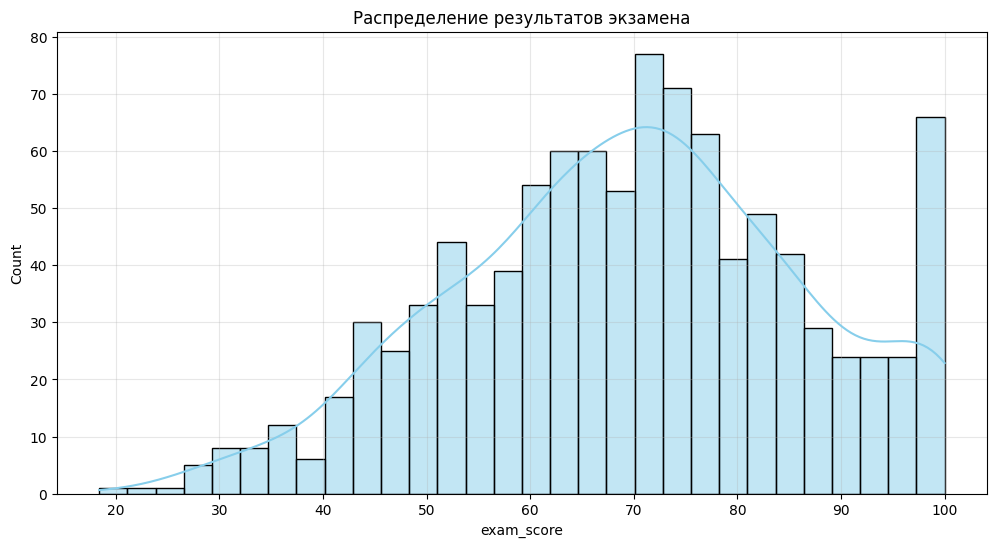

In [348]:
import seaborn as sns
import matplotlib.pyplot as plt

def draw_distribution_plot(df: pd.DataFrame, column_name: str, title: str):
    plt.figure(figsize=(12,6))
    sns.histplot(x=column_name, data=df, color='skyblue', bins=30, kde=True, legend=False)
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.show()


draw_distribution_plot(df, 'exam_score', title = "Распределение результатов экзамена")

**Вывод:** целевая переменная является сильно несбалансирована

Посмотрим на корреляцию данных.

***Определение 1: Корреляция данных — это статистическая мера, показывающая, насколько и в каком направлении связаны между собой две переменные.***

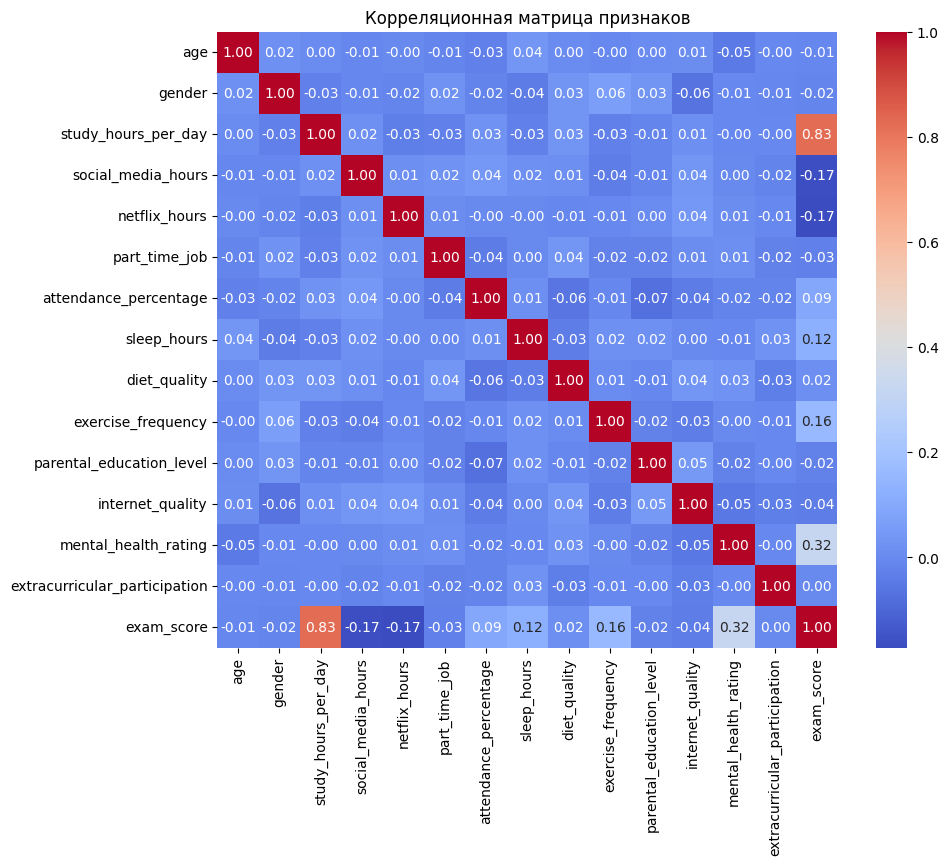

In [349]:
def draw_corr_matrix(df):
    plt.figure(figsize=(10,8))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Корреляционная матрица признаков")
    plt.show()

draw_corr_matrix(df)

**!!! ВАЖНО !!!**

**ЕСЛИ МЫ СОБИРАЕМСЯУЧИТЬ ЛИНЕЙНУЮ МОДЕЛЬ, И ДАННЫЕ КОРРЕЛИРУЮТ (МУЛЬТИКОЛЛИНЕАРНОСТЬ), ТО НУЖНО ЛИБО УДАЛИТЬ ОДИН ИЗ ПРИЗНАКОВ, ЛИБО СОЗДАТЬ НОВЫЙ ПРИЗНАК НА ИХ ОСНОВЕ И ИХ УДАЛИТЬ**

### 1.3. Подготовка датасета под разные задачи

Cравнение подготовки

| Модель                  | Масштабирование | Корреляция критична | Выбросы критичны | Feature Engineering рекомендуем                  |
| ----------------------- | --------------- | ------------------- | ---------------- | ------------------------------------------------ |
| Линейная регрессия      | Да              | Да                  | Да               | Полиномы, логарифмы, отношения                   |
| Random Forest Regressor | Нет             | Нет                 | Нет              | Соотношения, интеракции                          |
| XGBoost Regressor       | Нет             | Нет                 | Нет              | Соотношения, интеракции, логарифмы (опционально) |

#### 1.3.1 Линейная регрессия (Linear Regression / Ridge / Lasso)

**Особенности модели:**

- Чувствительна к масштабу признаков и мультиколлинеарности.
- Чувствительна к выбросам.

Сделаем копию датасета

In [350]:
df_linear = df.copy()

Рассмотрим скошенность данных

***Определение 2: Скошенность – это мера асимметрии распределения признака***

* **Скошенность > 0 (положительная):** Хвост распределения тянется вправо (большие значения встречаются реже).

* **Скошенность < 0 (отрицательная):** Хвост распределения тянется влево (малые значения редки).

* **Скошенность ≈ 0:** Практически нормальное распределение (симметричное).


In [351]:
skew_values = df_linear.skew()
skew_values_hard = skew_values[abs(skew_values) > 0.5]  # выделяем сильноскошенные данные
print(skew_values_hard)  # сильно скошенные

skew_columns_hard = list(skew_values_hard.index)
print(f'Скошенные столбцы {skew_columns_hard}')

part_time_job                    1.389546
extracurricular_participation    0.782795
dtype: float64
Скошенные столбцы ['part_time_job', 'extracurricular_participation']


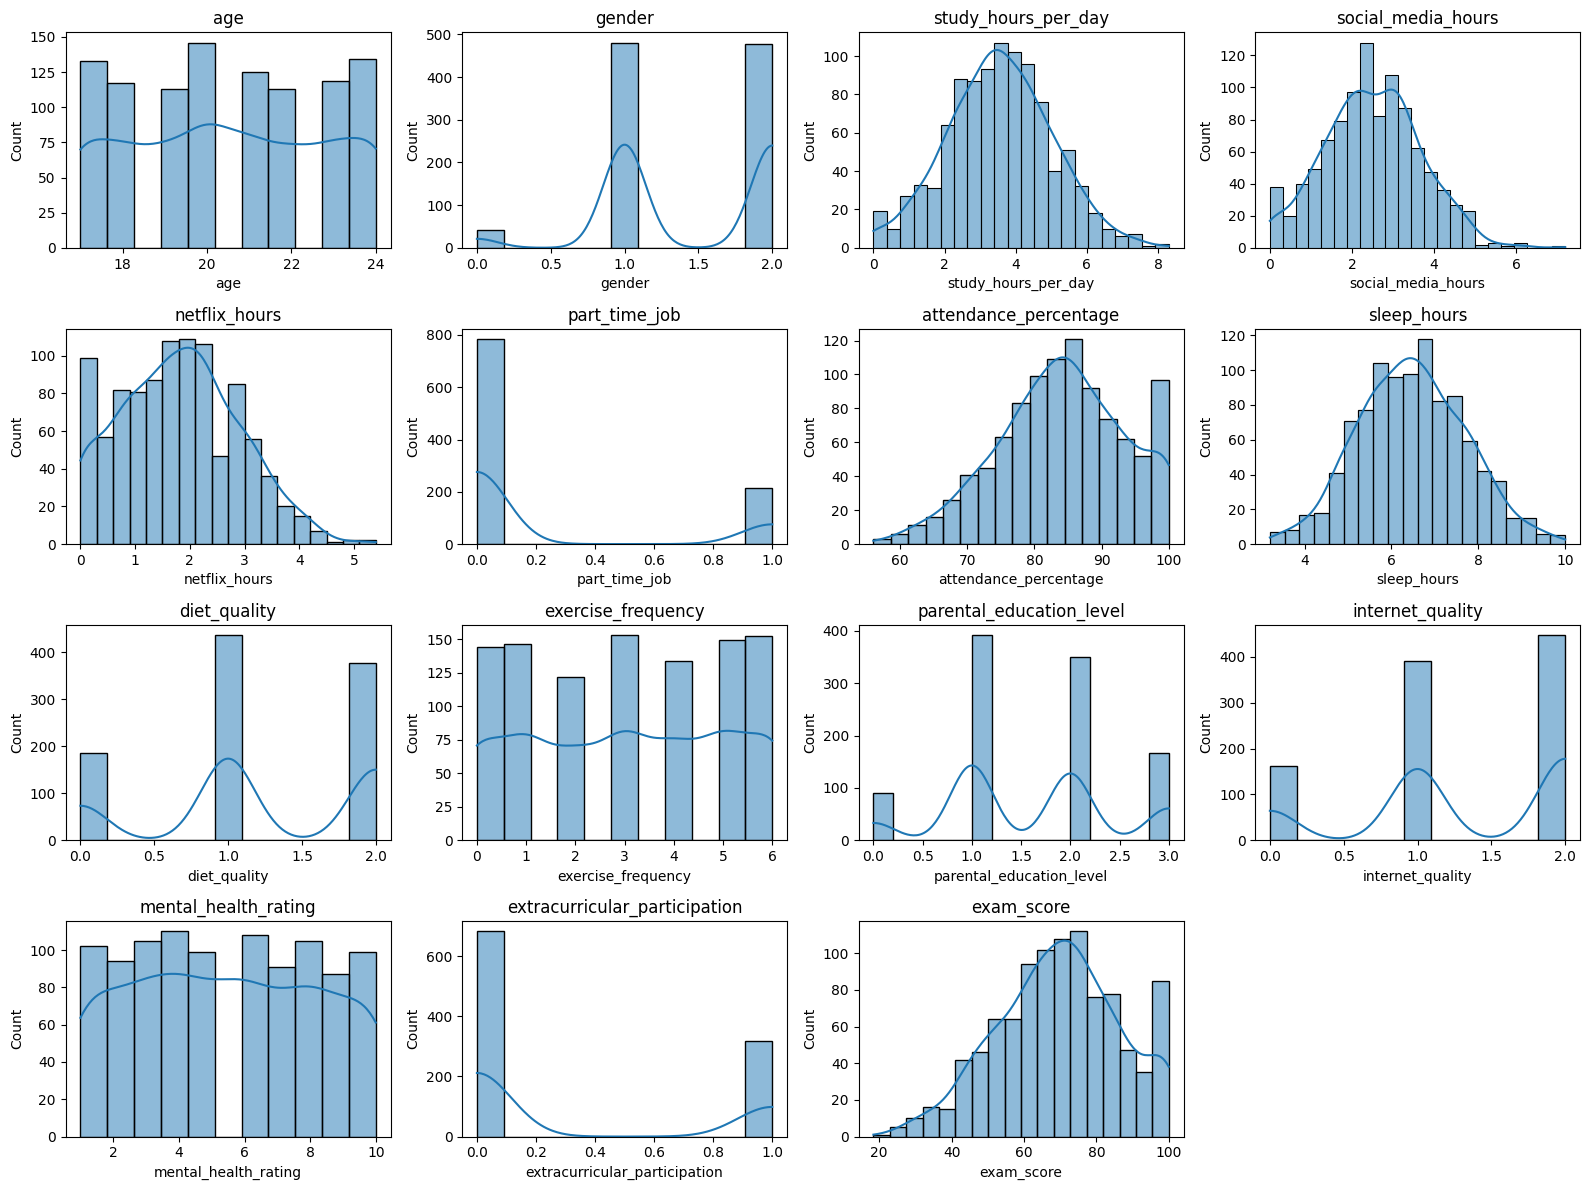

In [352]:
import math

def draw_skew(df: pd.DataFrame, n_cols=4):
    float_cols = df.select_dtypes(include=['int', 'float']).columns
    n_rows = math.ceil(len(float_cols) / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3))
    axs = axs.flatten()  # делаем одномерным массивом для удобства

    for i, col in enumerate(float_cols):
        sns.histplot(df[col], kde=True, ax=axs[i])
        axs[i].set_title(f'{col}')

    # Если графиков меньше, чем ячеек в сетке, скрываем лишние
    for j in range(i+1, len(axs)):
        axs[j].set_visible(False)

    plt.tight_layout()
    plt.show()


draw_skew(df_linear)

Можно уменьшить влияние скошенности с помошью:

- Логарифмирование (Уменьшаем положительный хвост)
- Квадратный корень  (сглаживаем умеренные хвосты)
- `Box-Cox` или `Yeo-Johnson` трансформации (более гибкие)

Мы же просто прологарифмируем :)

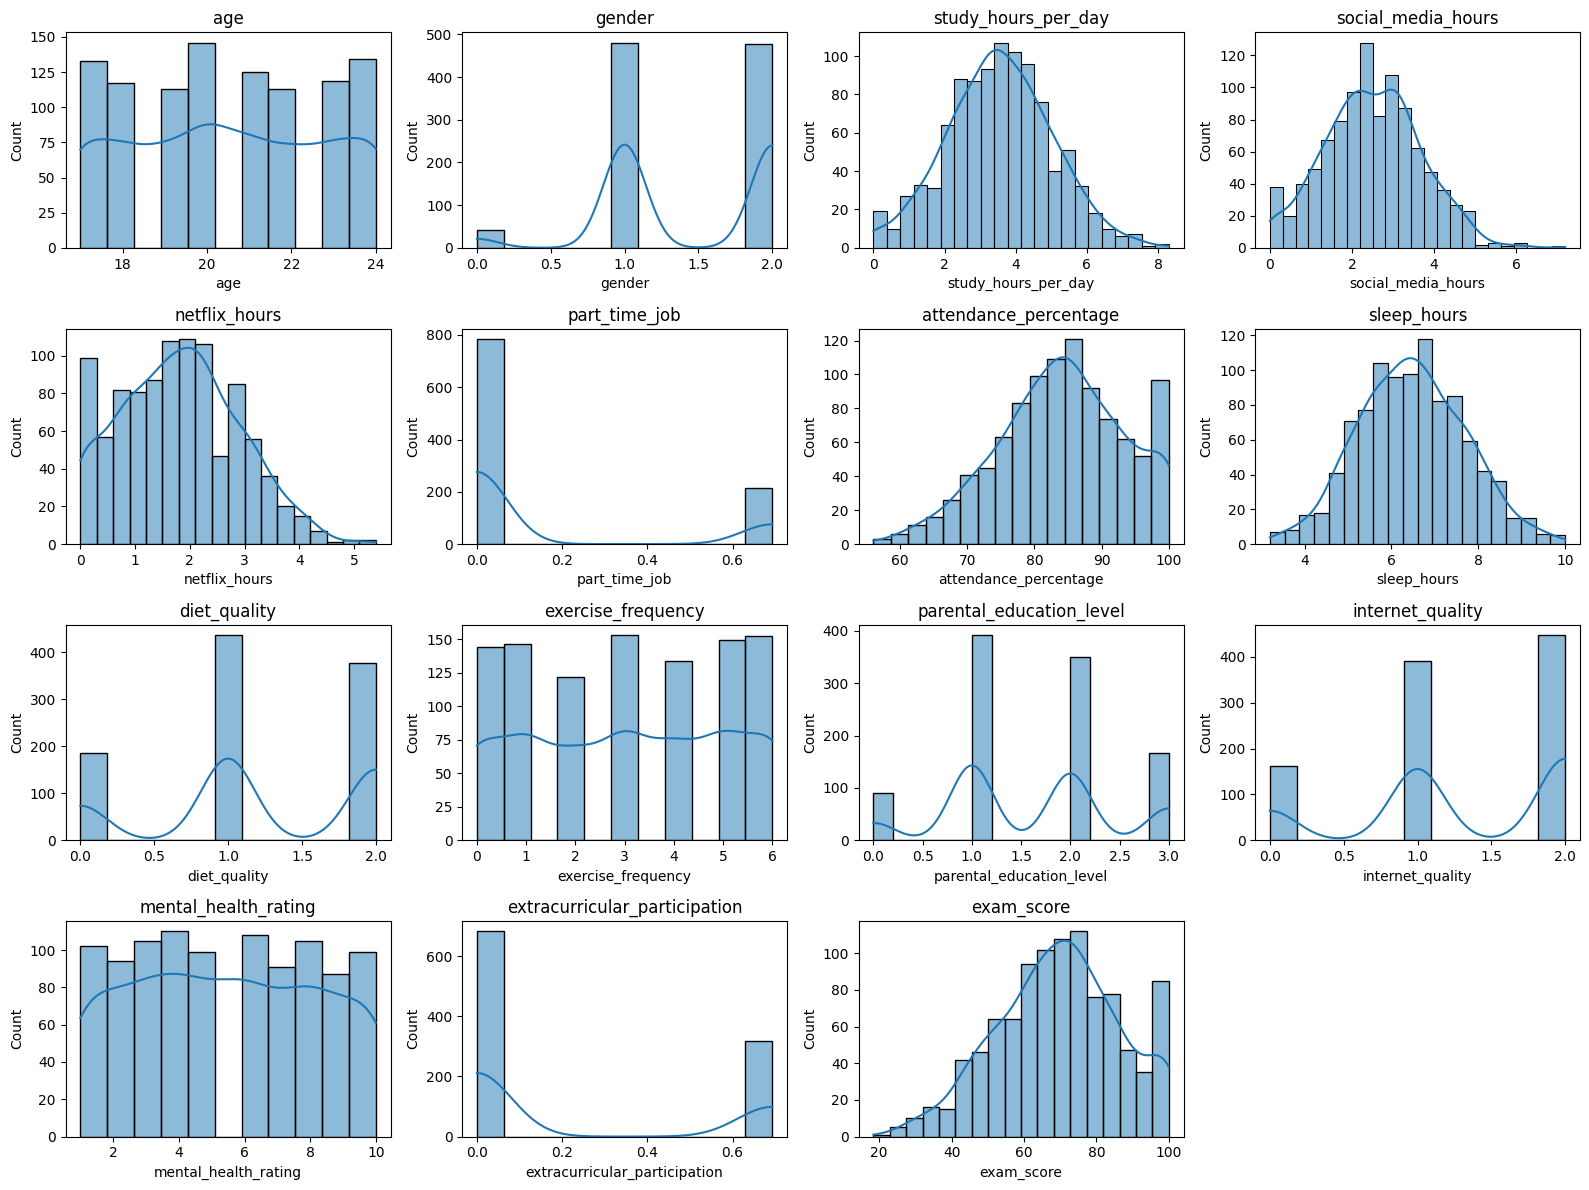

In [353]:
def prepare_skew(df: pd.DataFrame, columns: list[str]):
    for col in columns:
        df[col] = np.log1p(df[col])
    return df

df_linear = prepare_skew(df = df_linear, columns = skew_columns_hard)

draw_skew(df_linear)

Сделаем `Feature Engineering` (4 штуки)

Определение 3. Feature Engineering - процесс добавления новых зависимостей признаков.



In [354]:
# Полиномиальные признаки
if not USE_AUTO_POLY:
    # ручками
    df_linear['study_hours_squared'] = df_linear['study_hours_per_day'] ** 2
    df_linear['sleep_sqrt'] = df_linear['sleep_hours'] ** 0.5

    # Интерактивные признаки
    df_linear['study_social_interaction'] = df_linear['study_hours_per_day'] * df_linear['social_media_hours']
    df_linear['sleep_netflix_interaction'] = df_linear['sleep_hours'] * df_linear['netflix_hours']

    # Отношения
    df_linear['study_sleep_ratio'] = df_linear['study_hours_per_day'] / (df_linear['sleep_hours'] + 1e-5)
    df_linear['social_media_netflix_ratio'] = df_linear['social_media_hours'] / (df_linear['netflix_hours'] + 1e-5)

else:
    from sklearn.preprocessing import PolynomialFeatures

    # Выбираем только числовые признаки для полиномиальных преобразований
    num_features = [
        'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
        'attendance_percentage', 'sleep_hours', 'diet_quality',
        'exercise_frequency', 'internet_quality', 'mental_health_rating'
    ]

    X_num = df_linear[num_features]

    # Создаём генератор полиномиальных признаков (degree=2)
    poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

    X_poly = poly.fit_transform(X_num)

    # Получаем имена новых признаков
    feature_names = poly.get_feature_names_out()

    # Превращаем обратно в DataFrame
    df_poly = pd.DataFrame(X_poly, columns=feature_names, index=df_linear.index)

    # Объединяем с исходным DataFrame (если нужно оставить остальные признаки)
    df_linear = pd.concat([df_linear, df_poly], axis=1)



In [355]:
if not USE_AUTO_POLY:
    draw_corr_matrix(df_linear)
else:
    print(df_linear.corr())

                                              age    gender  \
age                                      1.000000  0.016886   
gender                                   0.016886  1.000000   
study_hours_per_day                      0.003971 -0.025375   
social_media_hours                      -0.009151 -0.009797   
netflix_hours                           -0.001174 -0.015345   
...                                           ...       ...   
exercise_frequency internet_quality     -0.007559 -0.001998   
exercise_frequency mental_health_rating -0.016478  0.046709   
internet_quality^2                       0.021224 -0.050898   
internet_quality mental_health_rating   -0.036467 -0.051985   
mental_health_rating^2                  -0.036444 -0.010759   

                                         study_hours_per_day  \
age                                                 0.003971   
gender                                             -0.025375   
study_hours_per_day                                

In [356]:
if not USE_AUTO_POLY:
    draw_skew(df_linear, 5)

Разделение датасета на признаки и целевую переменную

In [357]:
from sklearn.model_selection import train_test_split

X_linear = df_linear.drop(columns=['exam_score'])
y_linear = df_linear['exam_score']

# Разделение выборки на test/train (20/80)
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_linear, y_linear, test_size=0.2, random_state=RND_SEED
)

Данные для обучения модели нужно стандартизировать

***Определение 4: Стандартизация признаков — это метод преобразования числовых признаков так, чтобы они имели среднее значение 0 и стандартное отклонение 1. Это важный шаг в подготовке данных для моделей, чувствительных к масштабу признаков, например линейной регрессии, логистической регрессии, SVM, KNN.***

**Как это работает**

Для каждого признака $x$ вычисляется:

$$
x_\text{scaled} = \frac{x - \mu}{\sigma}
$$

где:

* $\mu$ — среднее значение признака в обучающей выборке,
* $\sigma$ — стандартное отклонение признака.

После стандартизации:

* Среднее значение нового признака ≈ 0
* Стандартное отклонение ≈ 1


In [358]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_linear_scaled = scaler.fit_transform(X_train_linear)  # вычисляет среднее и стандартное отклонение (только на train)
X_test_linear_scaled = scaler.transform(X_test_linear)  # применяет эти параметры к любым данным (train, test, новые данные)

#### 1.3.2 Random Forest Regressor

**Особенности модели:**

* Не чувствительна к масштабу признаков.
* Может обрабатывать сильные корреляции между признаками.
* Может использовать категориальные признаки, если они закодированы как числовые.


Сделаем копию датасета

In [359]:
df_forest = df.copy()

Feature engineering

In [360]:
# Добавим соотношение free/total sulfur dioxide
df_forest['study_sleep_ratio'] = df_forest['study_hours_per_day'] / (df_forest['sleep_hours'] + 1e-6)
df_forest['social_media_netflix_ratio'] = df_forest['social_media_hours'] / (df_forest['netflix_hours'] + 1e-6)

# Добавим интерактивный признак fixed acidity * citric acid
df_forest['study_social_interaction'] = df_forest['study_hours_per_day'] * df_forest['social_media_hours']
df_forest['sleep_netflix_interaction'] = df_forest['sleep_hours'] * df_forest['netflix_hours']

Разделение выборки

In [361]:
X_forest = df_forest.drop(columns=['exam_score'])
y_forest = df_forest['exam_score']

X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(
    X_forest, y_forest, test_size=0.2, random_state=RND_SEED
)

#### 1.3.3 XGBoost

**Особенности модели:**

* Градиентный бустинг деревьев.
* Не чувствителен к масштабу.
* Может обрабатывать коррелированные признаки, но слишком много слабых признаков может замедлить обучение.

Сделаем копию датасета

In [362]:
df_xgboost = df.copy()

Feature engineering

In [363]:
# Соотношения
df_xgboost['study_sleep_ratio'] = df_xgboost['study_hours_per_day'] / (df_xgboost['sleep_hours'] + 1e-5)
df_xgboost['social_media_netflix_ratio'] = df_xgboost['social_media_hours'] / (df_xgboost['netflix_hours'] + 1e-5)

# Интеракции
df_xgboost['study_social_interaction'] = df_xgboost['study_hours_per_day'] * df_xgboost['social_media_hours']
df_xgboost['sleep_netflix_interaction'] = df_xgboost['sleep_hours'] * df_xgboost['netflix_hours']

Разделение выборки

In [364]:
X_xgboost = df_xgboost.drop(columns=['exam_score'])
y_xgboost = df_xgboost['exam_score']

X_train_xgboost, X_test_xgboost, y_train_xgboost, y_test_xgboost = train_test_split(
    X_xgboost, y_xgboost, test_size=0.2, random_state=RND_SEED
)

## 2. Создание метрик

1. **MSE (Mean Squared Error)** – средняя квадратичная ошибка:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

* Чем меньше, тем лучше.
* Чувствительна к выбросам (квадрат ошибки усиливает влияние больших отклонений).

2. **RMSE (Root Mean Squared Error)** – корень из MSE:

$$
\text{RMSE} = \sqrt{\text{MSE}}
$$

* В тех же единицах, что и целевая переменная.
* Легче интерпретировать.

3. **MAE (Mean Absolute Error)** – средняя абсолютная ошибка:

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

* Менее чувствительна к выбросам, показывает «среднюю ошибку» в исходных единицах.

4. **R² (коэффициент детерминации)**:

$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$

* 1 → идеальное предсказание, 0 → модель не лучше среднего, <0 → хуже среднего.

**Как интерпретировать**

| Метрика | Как читать                    | Что значит для анализа                                                   |
| ------- | ----------------------------- | ------------------------------------------------------------------------ |
| MSE     | Чем меньше, тем точнее        | Показывает среднюю квадратичную ошибку. Выбросы сильно влияют.           |
| RMSE    | В тех же единицах, что и цель | Удобно для прямой интерпретации ошибок.                                  |
| MAE     | Средняя абсолютная ошибка     | Устойчивее к выбросам, показывает среднюю фактическую ошибку.            |
| R²      | 0–1 (или <0)                  | 1 — идеальное совпадение, 0 — предсказывает среднее, <0 — хуже среднего. |

**Пример анализа:**

* Если RMSE и MAE сильно отличаются → есть выбросы.
* Если R² близок к 1 → модель хорошо объясняет вариацию данных.
* Можно сравнивать модели: линейная, RF, XGBoost. Та, у которой меньше RMSE/MAE и выше R² — более точная.


In [365]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r2(y_true, y_pred):
    return 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))

def get_metrics(y_true, y_pred):
    return {
        'MSE': mse(y_true, y_pred),
        'RMSE': rmse(y_true, y_pred),
        'MAE': mae(y_true, y_pred),
        'R2': r2(y_true, y_pred)
    }


In [366]:
metrics = dict()

## 3. Базовая модель линейной регрессии (аналитическое решение)

In [367]:
# Создание линейной модели
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [368]:
# Обучение
lr.fit(X_train_linear_scaled, y_train_linear)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [369]:
# Прогонка и метрики
y_pred = lr.predict(X_test_linear_scaled)
lr_metrics = get_metrics(y_test_linear, y_pred)
metrics["lr"] = lr_metrics
lr_metrics

{'MSE': 26.942697254858103,
 'RMSE': 5.190635534773955,
 'MAE': 4.133541058246834,
 'R2': 0.9062989185157804}

## 4. Улучшенная версия линейной регрессии

In [370]:
from sklearn.linear_model import SGDRegressor

### 4.1. Градиентный спуск (симуляция)

In [371]:
# Создание линейной модели градиентного спуска
lr_gd = SGDRegressor(
    max_iter=2000,               # максимум итераций
    tol=1e-6,                    # остановка, когда улучшение < tol
    learning_rate='constant',  # тип изменения шага
    eta0=0.01,                   # стартовый шаг
    penalty='l2',                # регуляризация L2 (Ridge)
    shuffle=False,               # важный момент: не перемешиваем данные, чтобы был настоящий GD
    random_state=RND_SEED
)

In [372]:
# Обучение
lr_gd.fit(X_train_linear_scaled, y_train_linear)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,2000
,tol,1e-06
,shuffle,False
,verbose,0
,epsilon,0.1
,random_state,21


In [373]:
# Прогонка и метрики
y_pred = lr_gd.predict(X_test_linear_scaled)
lr_gd_metrics = get_metrics(y_test_linear, y_pred)
metrics["lr_gd"] = lr_gd_metrics
lr_gd_metrics

{'MSE': 32.75333146884551,
 'RMSE': 5.723052635512407,
 'MAE': 4.656310298384613,
 'R2': 0.886090744671506}

### 4.2. Стохастический градиентный спуск

In [374]:
# Инициализация модели
lr_sgd = SGDRegressor(
    max_iter=2000,                # максимум итераций
    tol=1e-6,                     # остановка, когда улучшение < tol
    learning_rate='invscaling',   # тип изменения шага
    eta0=0.01,                    # стартовый шаг
    penalty='l1',                 # регуляризация L2 (Ridge)
    random_state=RND_SEED
)

In [375]:
# Обучение
lr_sgd.fit(X_train_linear_scaled, y_train_linear)

,loss,'squared_error'
,penalty,'l1'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,2000
,tol,1e-06
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,21


In [376]:
# Прогонка и метрики
y_pred = lr_sgd.predict(X_test_linear_scaled)
lr_sgd_metrics = get_metrics(y_test_linear, y_pred)
metrics["lr_sgd"] = lr_sgd_metrics
lr_sgd_metrics

{'MSE': 29.133777268987107,
 'RMSE': 5.397571423240929,
 'MAE': 4.319956836062233,
 'R2': 0.898678799230755}

### 4.3. Линейная модель с регуляризацией Rigde (L2)

In [377]:
# Инициализация модели
from sklearn.linear_model import Ridge
lr_ridge = Ridge(alpha=1.0)

In [378]:
# Обучение
lr_ridge.fit(X_train_linear_scaled, y_train_linear)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [379]:
# Прогонка и метрики
y_pred = lr_ridge.predict(X_test_linear_scaled)
lr_ridge_metrics = get_metrics(y_test_linear, y_pred)
metrics["lr_ridge"] = lr_ridge_metrics
lr_ridge_metrics

{'MSE': 27.102144389923268,
 'RMSE': 5.20597199281011,
 'MAE': 4.143393472600159,
 'R2': 0.9057443946366809}

### 4.3. Линейная модель с регуляризацией Lasso (L1)

In [380]:
# Инициализация модели
from sklearn.linear_model import Lasso
lr_lasso = Lasso(alpha=0.01)

In [381]:
# Обучение
lr_lasso.fit(X_train_linear_scaled, y_train_linear)

,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [382]:
# Прогонка и метрики
y_pred = lr_lasso.predict(X_test_linear_scaled)
lr_lasso_metrics = get_metrics(y_test_linear, y_pred)
metrics["lr_lasso"] = lr_lasso_metrics
lr_lasso_metrics

{'MSE': 27.307104805683466,
 'RMSE': 5.2256200403094235,
 'MAE': 4.180289557809015,
 'R2': 0.9050315850602484}

### 4.4. Линейная модель с регуляризацией ElasticNet (комбинация L1+L2)

In [383]:
# Инициализация модели
from sklearn.linear_model import ElasticNet
lr_enet = ElasticNet(alpha=0.01, l1_ratio=0.5)

In [384]:
# Обучение
lr_enet.fit(X_train_linear_scaled, y_train_linear)

,alpha,0.01
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [385]:
# Прогонка и метрики
y_pred = lr_enet.predict(X_test_linear_scaled)
lr_enet_metrics = get_metrics(y_test_linear, y_pred)
metrics["lr_enet"] = lr_enet_metrics
lr_enet_metrics

{'MSE': 27.807573124456404,
 'RMSE': 5.273288644143842,
 'MAE': 4.19316421848677,
 'R2': 0.9032910606326446}

## 4. Случайный лес регрессор

In [386]:
# Инициализация модели
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=200,      # количество деревьев
    max_depth=None,        # глубина деревьев
    random_state=RND_SEED,
    n_jobs=-1              # использовать все ядра процессора
)

In [387]:
# Обучение
rf.fit(X_train_forest, y_train_forest)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [388]:
# Прогонка и метрики
y_pred = rf.predict(X_test_forest)
rf_metrics = get_metrics(y_test_forest, y_pred)
metrics["rf"] = rf_metrics
rf_metrics

{'MSE': 42.00150964125006,
 'RMSE': 6.480857168712335,
 'MAE': 5.2081975000000025,
 'R2': 0.8539275099249622}

## 5. Градиентный бустинг (XGBoost)

In [389]:
# Инициализация модели
import xgboost
xgb = xgboost.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=RND_SEED
)

In [390]:
# Обучение
xgb.fit(X_train_xgboost, y_train_xgboost)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [391]:
# Прогонка и метрики
y_pred = xgb.predict(X_test_xgboost)
xgb_metrics = get_metrics(y_test_xgboost, y_pred)
metrics["xgb"] = xgb_metrics
xgb_metrics

{'MSE': 33.69100669392123,
 'RMSE': 5.804395463260686,
 'MAE': 4.585397958755493,
 'R2': 0.882829705814132}

## 5. Feature Importance

### 5.1 Linear Regression


В **линейных моделях** (LinearRegression, Ridge, Lasso) **feature importance** — это не что иное, как **коэффициенты модели (`coef_`)**.

Но есть нюансы:

* Коэффициенты сами по себе могут быть несопоставимы по масштабу признаков.
* Поэтому мы правильно сделали **стандартизацию (StandardScaler)** → теперь коэффициенты отражают вклад признаков.
* Знак коэффициента (+ / -) показывает направление влияния:

  * `+` → признак увеличивает предсказание результата,
  * `-` → уменьшает.


C:\Users\MegaComp\AppData\Local\Temp\ipykernel_644\1890694410.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


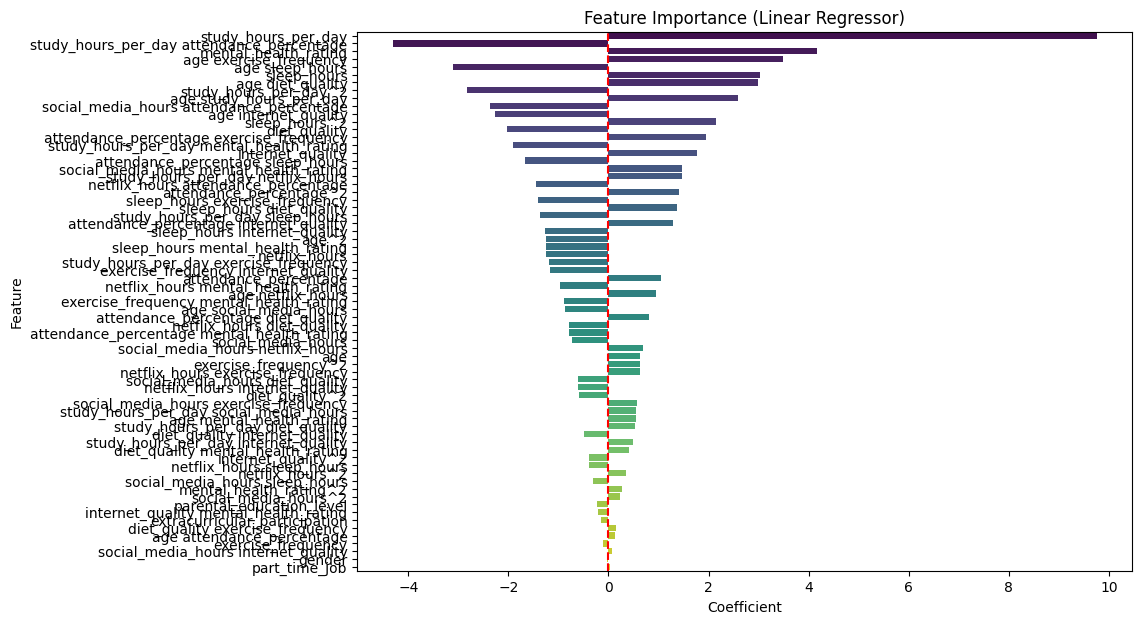

In [392]:
importance = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (Linear Regressor)')
plt.show()

### 5.2 Linear Regression (GD)


C:\Users\MegaComp\AppData\Local\Temp\ipykernel_644\1738530882.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


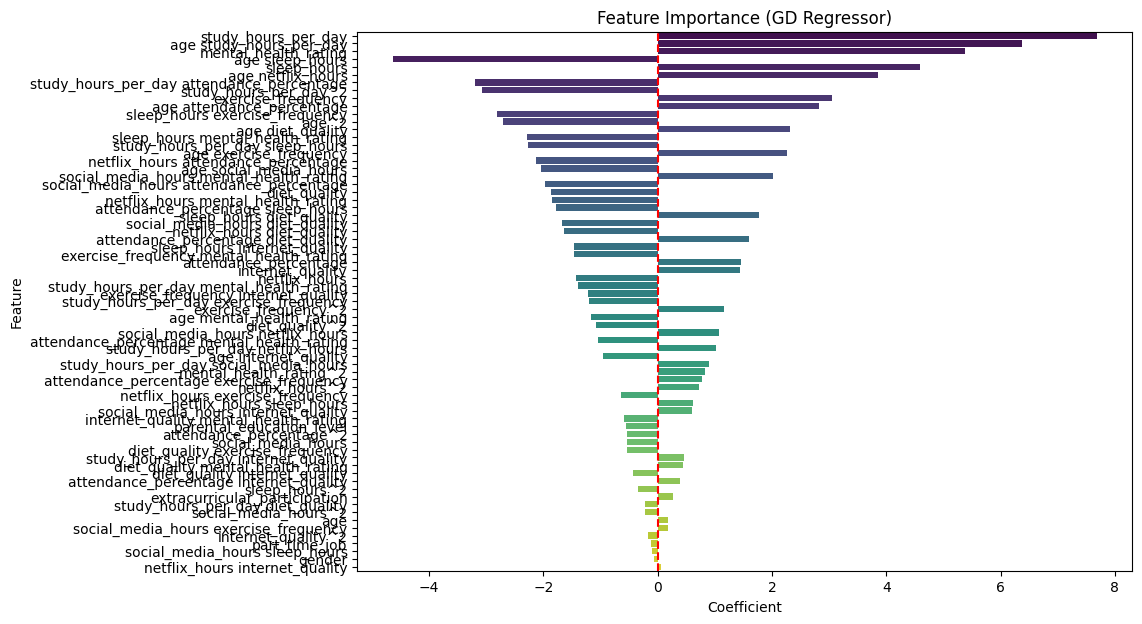

In [393]:
importance = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': lr_gd.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (GD Regressor)')
plt.show()

### 5.3 Linear Regression (SGD)


C:\Users\MegaComp\AppData\Local\Temp\ipykernel_644\313950785.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


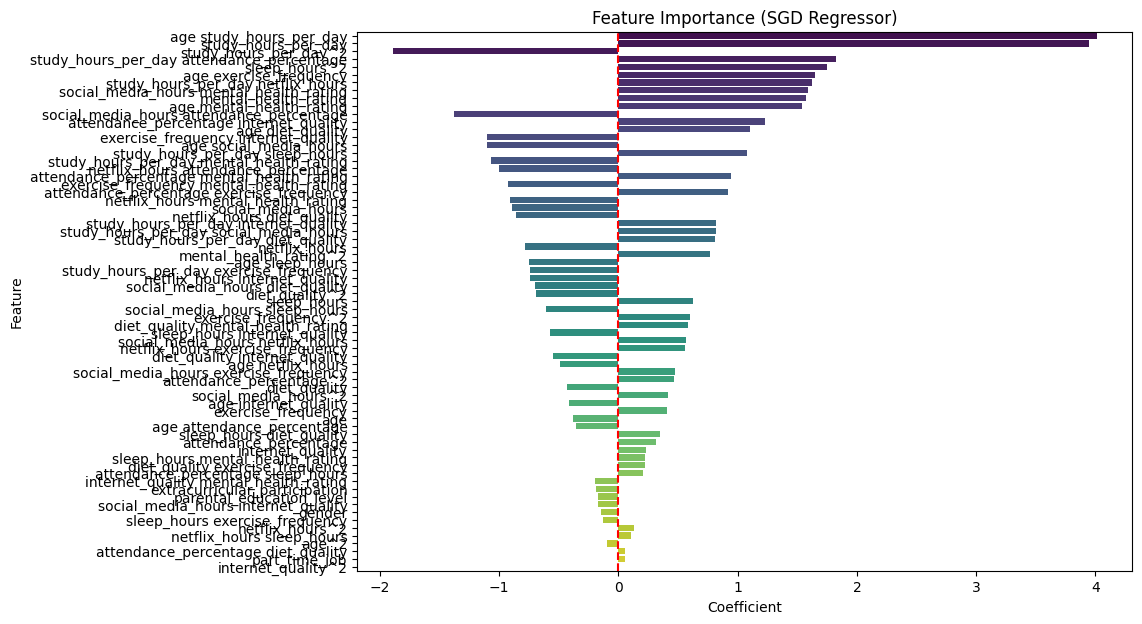

In [394]:
importance = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': lr_sgd.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (SGD Regressor)')
plt.show()

### 5.4 Linear Regression (Rigde)


C:\Users\MegaComp\AppData\Local\Temp\ipykernel_644\3981989715.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


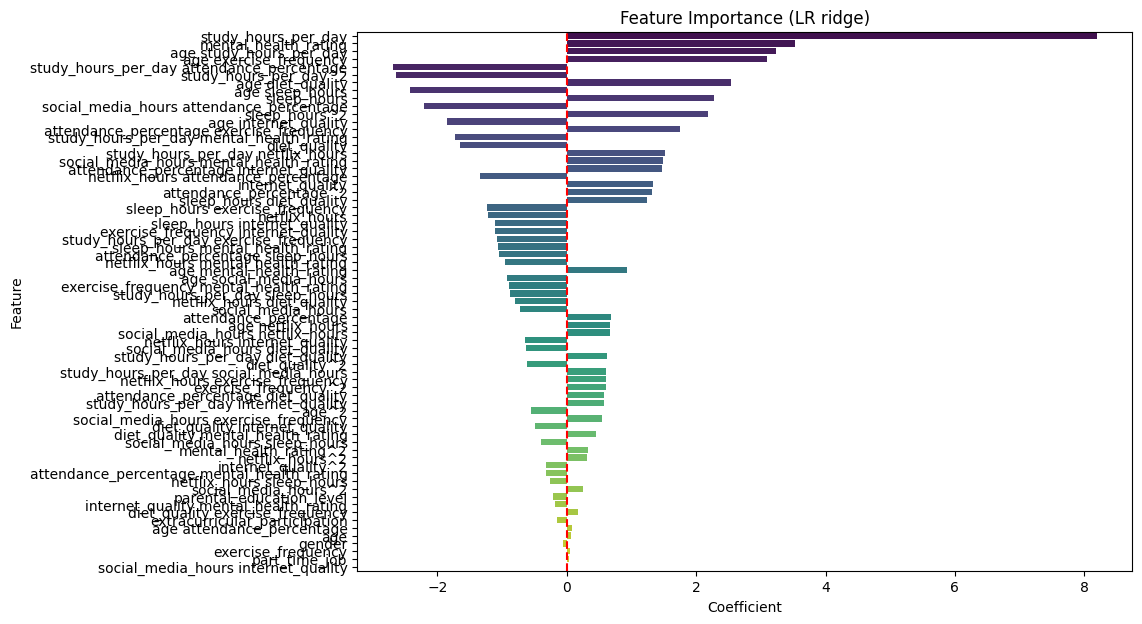

In [395]:
importance = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': lr_ridge.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (LR ridge)')
plt.show()

### 5.5 Linear Regression (Lasso)


C:\Users\MegaComp\AppData\Local\Temp\ipykernel_644\3593077356.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


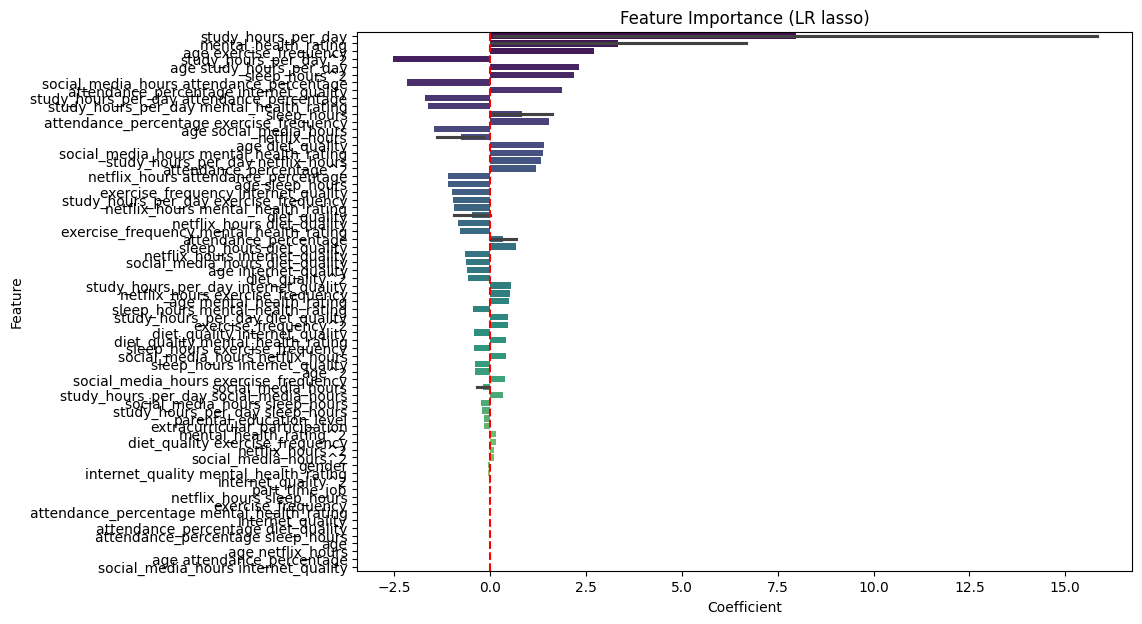

In [396]:
importance = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': lr_lasso.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (LR lasso)')
plt.show()

### 5.6 Linear Regression (ElasticNet)


C:\Users\MegaComp\AppData\Local\Temp\ipykernel_644\1001377755.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


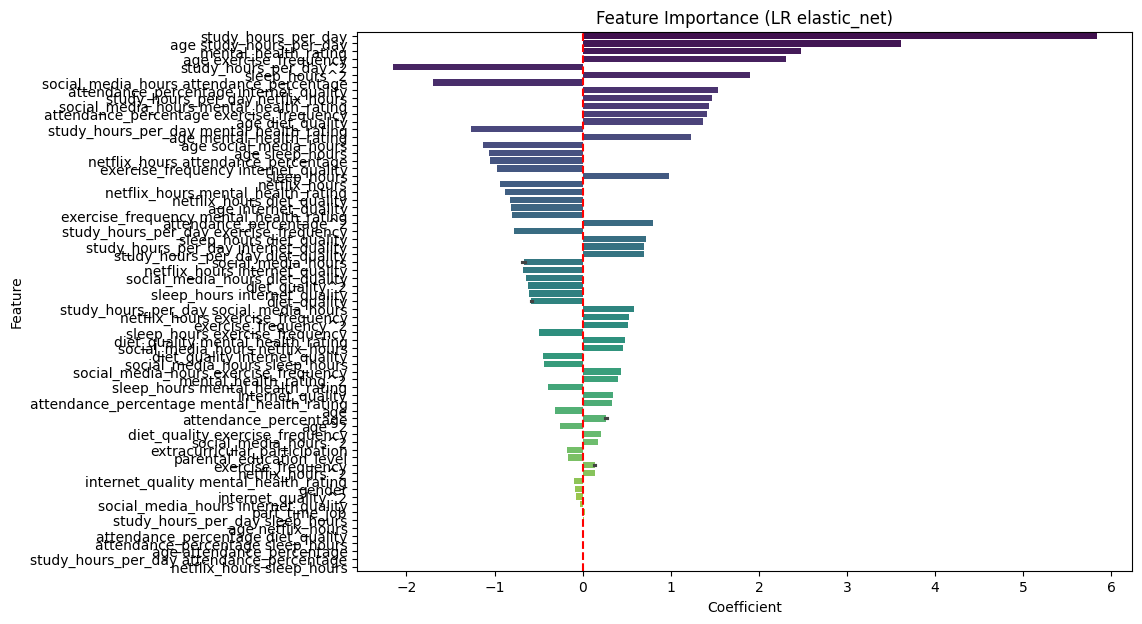

In [397]:
importance = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': lr_enet.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (LR elastic_net)')
plt.show()

### 5.7 Random Forest


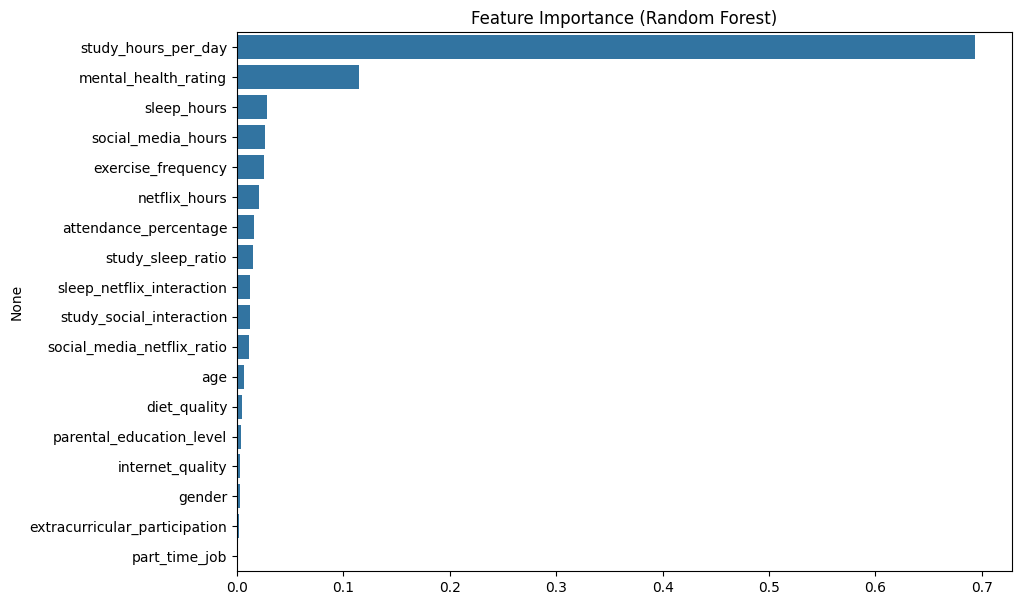

In [398]:
feature_importances = pd.Series(rf.feature_importances_, index=X_forest.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importance (Random Forest)")
plt.show()

### 5.6 XGBoost

<Figure size 1000x700 with 0 Axes>

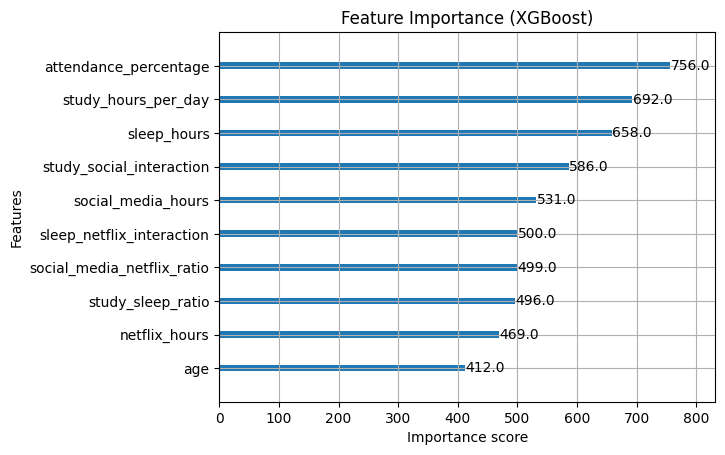

In [399]:
plt.figure(figsize=(10,7))
xgboost.plot_importance(xgb, importance_type='weight', max_num_features=10)
plt.title("Feature Importance (XGBoost)")
plt.show()

## 8. Написание своих реализаций (классы)

Напишите свои классы реализации:

- LR
- LR + GD
- LR + SGD
- *Random Forest (не обязательно)
- *Gradient Boosting Regressor (не обязательно)

In [ ]:
class LR:
    def __init__(self):
        self.weights = None  
    
    def fit(self, X, y):
        
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        
        self.weights = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y
    
    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b @ self.weights


class LR_GD:
    def __init__(self, lr=0.01, n_iter=1000):
        self.lr = lr          
        self.n_iter = n_iter  
        self.weights = None
    
    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        m, n = X_b.shape
        self.weights = np.zeros(n)
        
        for _ in range(self.n_iter):
            gradients = (2/m) * X_b.T @ (X_b @ self.weights - y)
            self.weights -= self.lr * gradients
    
    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b @ self.weights


class LR_SGD:
    def __init__(self, lr=0.01, n_iter=50):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        m, n = X_b.shape
        self.weights = np.zeros(n)

        for epoch in range(self.n_iter):
            eta = self.lr / (1 + epoch)
            indices = np.random.permutation(m)
            for i in indices:
                xi = X_b[i:i+1]
                yi = y[i:i+1]
                gradients = 2 * xi.T @ (xi @ self.weights - yi)
                self.weights -= eta * gradients

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b @ self.weights


In [401]:

model_lr = LR()
model_lr.fit(X_train_linear_scaled, y_train_linear)
y_pred = model_lr.predict(X_test_linear_scaled)
model_lr_metrics = get_metrics(y_test_linear, y_pred)
print(model_lr_metrics)


model_lr_gd = LR_GD(lr=0.01, n_iter=1000)
model_lr_gd.fit(X_train_linear_scaled, y_train_linear)
y_pred = model_lr_gd.predict(X_test_linear_scaled)
model_lr_gd_metrics = get_metrics(y_test_linear, y_pred)
print(model_lr_gd_metrics)


model_lr_sgd = LR_SGD(lr=0.01, n_iter=50)
model_lr_sgd.fit(X_train_linear_scaled, y_train_linear)
y_pred = model_lr_sgd.predict(X_test_linear_scaled)
model_lr_sgd_metrics = get_metrics(y_test_linear, y_pred)
print(model_lr_sgd_metrics)

{'MSE': 26.94269725485705, 'RMSE': 5.190635534773853, 'MAE': 4.133541058246746, 'R2': 0.906298918515784}
{'MSE': 29.47581545352312, 'RMSE': 5.429163421147233, 'MAE': 4.279732693892646, 'R2': 0.8974892617654908}
{'MSE': 28.93650835323004, 'RMSE': 5.3792665255804195, 'MAE': 4.289177880849551, 'R2': 0.8993648593744298}


## 9. Итоги

Что сделать?

1. Сгрупировать все метрики, и выяснить, какой методо сработал лучше всего и почему?
2. Ответить на вопросы:

    1. Что такое регрессия и чем она отличается от классификации?
    2. Какова целевая переменная в задаче регрессии?
    3. Зачем нужно масштабирование признаков перед обучением линейной регрессии?
    4. Что означает коэффициент признака в линейной регрессии?
    5. Что такое MSE, RMSE, MAE и R², и чем они отличаются?
    6. В чем разница между Ridge и Lasso регуляризацией?
    7. Почему деревья решений и Random Forest не требуют стандартизации признаков?
    8. Что такое мультиколлинеарность и почему она мешает линейной регрессии?
    9. Как можно уменьшить влияние выбросов на линейную регрессию?
    10. Какие гиперпараметры наиболее важны для Random Forest Regressor?
    11. Какие гиперпараметры наиболее важны для XGBoost в задаче регрессии?
    12. Что значит глубина дерева (max\_depth) и как она влияет на модель?
    13. Зачем нужен `learning_rate` в градиентном бустинге?
    14. Как можно оценить важность признаков (feature importance) в линейной регрессии, случайном лесу и XGBoost?
    15. Почему XGBoost часто работает лучше, чем Random Forest, на структурированных данных?
    16. Что такое переобучение и как его можно выявить на графике обучения?
    17. Как работает метод ансамблирования в Random Forest (bagging)?
    18. В чем отличие бустинга от бэггинга?
    19. Какие способы feature engineering можно применить к винному датасету (Wine Quality)?
    20. Как использовать кросс-валидацию для подбора гиперпараметров моделей регрессии?


#### 9.1. Группировка метрик

In [402]:
df_metrics = pd.DataFrame(metrics).T
df_metrics

,MSE,RMSE,MAE,R2
lr,26.942697,5.190636,4.133541,0.906299
lr_gd,32.753331,5.723053,4.656310,0.886091
lr_sgd,29.133777,5.397571,4.319957,0.898679
lr_ridge,27.102144,5.205972,4.143393,0.905744
lr_lasso,27.307105,5.225620,4.180290,0.905032
lr_enet,27.807573,5.273289,4.193164,0.903291
rf,42.001510,6.480857,5.208198,0.853928
xgb,33.691007,5.804395,4.585398,0.882830


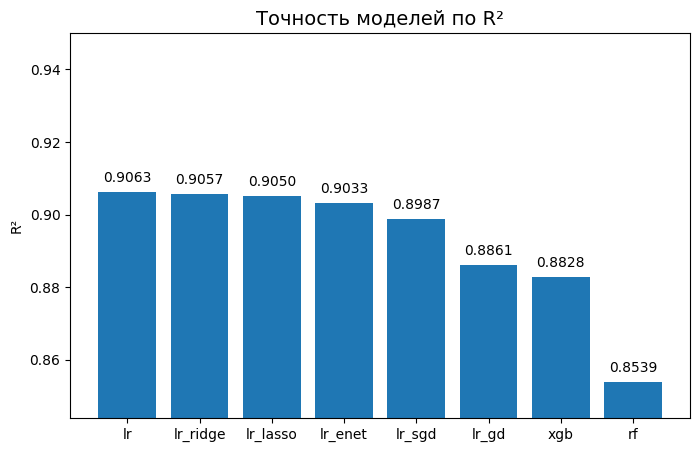

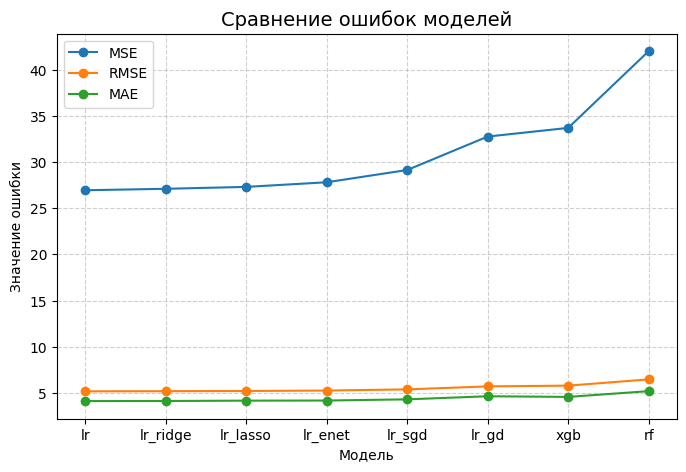

In [337]:
plt.figure(figsize=(8,5))
r2_sorted = df_metrics.sort_values(by="R2", ascending=False)

plt.bar(r2_sorted.index, r2_sorted["R2"])
plt.title("Точность моделей по R²", fontsize=14)
plt.ylabel("R²")
y_min = max(0, r2_sorted["R2"].min() - 0.01)
plt.ylim(y_min, 0.95)
for i, val in enumerate(r2_sorted["R2"]):
    plt.text(i, val + 0.002, f"{val:.4f}", ha='center', va='bottom', fontsize=10)
plt.show()


plt.figure(figsize=(8,5))

for metric in ["MSE", "RMSE", "MAE"]:
    plt.plot(r2_sorted.index, r2_sorted[metric], marker="o", label=metric)

plt.title("Сравнение ошибок моделей", fontsize=14)
plt.xlabel("Модель")
plt.ylabel("Значение ошибки")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

#### 9.2. Ответы на вопросы

**Вопрос**: Что такое регрессия и чем она отличается от классификации?

**Ответ**: Регрессия - это задача машинного обучения, в которой нам требуется предсказать непрерывное числовое значение на основе имеющихся у нас характеристик (например, предсказать оценку экзамена по имеющимся данным об образе жизни студента). Классификация, в отличие от регрессии, - это задача по определению категории или класса, к которому относится наш объект (например, определить, является ли письмо спамом по его содержанию).


**Вопрос**: Какова целевая переменная в задаче регрессии?

**Ответ**: Целевой переменной в задаче регрессии является непрерывная числовая величина. Эту величину необходимо предсказать по другим имеющимся данным.


**Вопрос**: Зачем нужно масштабирование признаков перед обучением линейной регрессии?

**Ответ**: Это необходимо для того, чтобы в случае большого разброса значений какого-либо из признаков функция ошибки становится слишком "вытянутой", что усложняет дальнейшую работу с ней. Кроме того, если все данные приведены к одному масштабу, с ними становится крайне удобно работать, ведь это позволяет сравнивать линейную регрессию напрямую.


**Вопрос**: Что означает коэффициент признака в линейной регрессии?

**Ответ**: В линейной регрессии коэффициент признака показывает, как изменяется предсказываемая целевая переменная при изменении данного признака на единицу, при фиксированных остальных признаках.


**Вопрос**: Что такое MSE, RMSE, MAE и R², и чем они отличаются?

**Ответ**: MSE - cреднее значение квадратов разностей между предсказанными и истинными значениями. RMSE - корень квадратный из MSE. MAE - cреднее значение абсолютных разностей между предсказанными и истинными значениями. R² - показывает, какую долю дисперсии  целевой переменной способно предсказать модель. MSE и RMSE имеют высокую чувствительность к выбросам, подходят для решения задач, где большие ошибки критичны. MAE - метрика, показывающая среднюю ошибку модели в некоторых единицах. R² - относительная мера качества модели.


**Вопрос**: В чем разница между Ridge и Lasso регуляризацией?

**Ответ**: Ridge - добавляем к MSE сумму квадратов коэффициентов признаков. Lasso - добавляем к MSE сумму модулей коэффициентов признаков. Ridge штрафует модель за большие значения весов, стягивая их значения ближе к нулю. Lasso - обнуляет веса наименее важных признаков.


**Вопрос**: Почему деревья решений и Random Forest не требуют стандартизации признаков?

**Ответ**: Деревья решений и Random Forest не требуют стандартизации признаков, потому что их механизм принятия решений основан не на расстояниях или градиентах, а на последовательном упорядоченном разбиении данных, которое зависит только от порядка значений в признаках, а не от их абсолютной величины.


**Вопрос**: Что такое мультиколлинеарность и почему она мешает линейной регрессии?

**Ответ**: Мультиколлинеарность - это ситуация при решении задачи регрессии, когда два или более признака (независимые переменные) сильно коррелированы между собой (значения одного признака легко предсказать, зная значения другого). Мультиколлинеарность создаёт проблемы для решения регрессии, так как затрудняет понимание того, какой именно из признаков влияет на целевую переменную.


**Вопрос**: Как можно уменьшить влияние выбросов на линейную регрессию?

**Ответ**: Необходимо либо выполнить предобработку данных, избавившись от выбросов заранее, либо использовать другие метрики/модели.


**Вопрос**: Какие гиперпараметры наиболее важны для Random Forest Regressor?

**Ответ**: Наиболее вважны: 1) n_estimators - количество деревьев; 2) max_depth - максимальная глубина дерева; 3) min_samples_split - минимальное число объектов в узле для разделения; 4) min_samples_leaf - минимальное число объектов в листе; 5) max_features - сколько признаков случайно выбирается при каждом разбиении.


**Вопрос**: Какие гиперпараметры наиболее важны для XGBoost в задаче регрессии?

**Ответ**: Наиболее важны: 1) n_estimators - количество итераций бустинга; 2) learning_rate - скорость обучения, интенсивность исправления ошибок нашим деревом; 3) max_depth - максимальная глубина дерева; 4) min_child_weight - минимальное количество объектов в листе; 5) colsample_bytree - доля признаков, выбираемая при построении каждого дерева.


**Вопрос**: Что значит глубина дерева (max\_depth) и как она влияет на модель?

**Ответ**: Глубина дерева - это максимальное число разбиений от корня до листа. (Допустим, если max_depth = 3, то у нас может быть 2^3 = 8 листов). Чем меньше глубина - тем больше дерево подходит для работы с мелкой выборкой данных.


**Вопрос**: Зачем нужен `learning_rate` в градиентном бустинге?

**Ответ**: learning_rate контролирует, насколько сильно каждое следующее дерево может влиять на итоговый прогноз. Он замедляет процесс обучения, заставляя модель учиться маленькими шагами, что в итоге приводит к гораздо лучшему результату.


**Вопрос**: Как можно оценить важность признаков (feature importance) в линейной регрессии, случайном лесу и XGBoost?

**Ответ**: Линейная регрессия: интерпретация через коэффициенты модели, p-values, влияние на метрику. Случайный лес: Gini Importance, Permutation Importance. XGBoost: gain, weight, cover, Permutation Importance


**Вопрос**: Почему XGBoost часто работает лучше, чем Random Forest, на структурированных данных?


**Ответ**: XGBoost использует градиентный бустинг, за счёт чего исправляет ошибки предыдущих деревьев. Кроме того, XGBoost имеет более гибкую настройку и встроенную регуляризацию и контроль сложности.


**Вопрос**: Что такое переобучение и как его можно выявить на графике обучения?

**Ответ**: Переобучение - это ситуация, когда модель слишком точно подстраивается под обучающие данные, включая шум и выбросы, из-за чего падение ошибки на обучающей выборке идёт слишком быстро, но ошибка на тестовой/валидационной выборке остаётся высокой или даже растёт.


**Вопрос**: Как работает метод ансамблирования в Random Forest (bagging)?

**Ответ**: Ансамблирование — это когда несколько моделей объединяются, чтобы получить более точный и устойчивый прогноз, чем каждая отдельно. В Random Forest используется bagging, который позволяет усреднить предсказания деревьев.


**Вопрос**: В чем отличие бустинга от бэггинга?

**Ответ**: Bagging - усреднение предсказанных значений деревьев, построенных по предвыборкам данных. Boosting - система обучения, при которой первое дерево обучается на всех данных, после чего последующие деревья обучаются с учётом ошибок предыдущих.


**Вопрос**: Какие способы feature engineering можно применить к винному датасету (Wine Quality)?

**Ответ**: Например, можно создать дополнительные признаки на основе имеющихся, выполнить Feature selection (удалить столбец id) или применить логарифмирование.

**Вопрос**: Как использовать кросс-валидацию для подбора гиперпараметров моделей регрессии?

Ответ: Необходимо разбить данные на K частей. Модель обучается на K–1 частях и проверяется на оставшейся. Средняя метрика ошибки даёт оценку качества. Подбор гиперпараметров происходит так: Задаём сетку возможных значений (max_depth, n_estimators и т.д.); Для каждой комбинации выполняем K-fold кросс-валидацию; Выбираем параметры с лучшей средней метрикой (RMSE, R² и т.п.).